In [1]:
import pandas as pd

pd.core.common.is_list_like = pd.api.types.is_list_like # so that pandas_data_reader can work with pandas

import pandas_datareader.data as web

import datetime

In [2]:
begin = datetime.datetime(1997, 1, 1)

end = datetime.datetime(2018, 12, 30)

## Civilian Unemployment Rate (UNRATE)

U.S. Bureau of Labor Statistics, Civilian Unemployment Rate [UNRATE], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/UNRATE, October 26, 2018.

In [3]:
unrate = web.DataReader('UNRATE', 'fred', begin, end)

In [4]:
unrate.describe()

,UNRATE
count,261.000000
mean,5.823755
std,1.729798
min,3.700000
25%,4.600000
50%,5.200000
75%,6.500000
max,10.000000


In [5]:
unrate.head()

,UNRATE
DATE,
1997-01-01,5.3
1997-02-01,5.2
1997-03-01,5.2
1997-04-01,5.1
1997-05-01,4.9


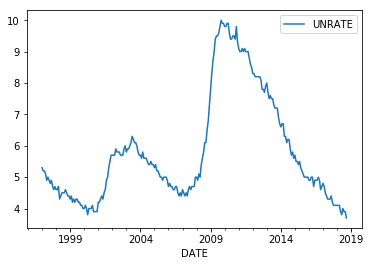

In [15]:
unrate.plot()

## All Employees: Total Nonfarm Payrolls (PAYEMS)

U.S. Bureau of Labor Statistics, All Employees: Total Nonfarm Payrolls [PAYEMS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PAYEMS, October 26, 2018.

In [7]:
payems = web.DataReader('PAYEMS', 'fred', begin, end)

In [8]:
payems.describe()

,PAYEMS
count,261.000000
mean,134636.704981
std,6163.276051
min,121379.000000
25%,130632.000000
50%,132924.000000
75%,138008.000000
max,149500.000000


In [9]:
payems.head()

,PAYEMS
DATE,
1997-01-01,121379
1997-02-01,121687
1997-03-01,121999
1997-04-01,122291
1997-05-01,122554


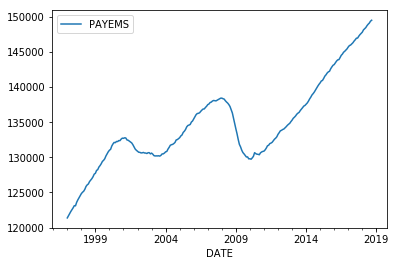

In [10]:
payems.plot()

## Charge-Off Rate on Credit Card Loans, Top 100 Banks Ranked by Assets (CORCCT100S)

Board of Governors of the Federal Reserve System (US), Charge-Off Rate on Credit Card Loans, Top 100 Banks Ranked by Assets [CORCCT100S], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CORCCT100S, October 26, 2018.

In [11]:
corcct100s = web.DataReader('CORCCT100S', 'fred', begin, end)

In [12]:
corcct100s.describe()

,CORCCT100S
count,86.000000
mean,4.844884
std,1.834742
min,2.870000
25%,3.565000
50%,4.420000
75%,5.362500
max,10.680000


In [13]:
corcct100s.head()

,CORCCT100S
DATE,
1997-01-01,4.56
1997-04-01,5.06
1997-07-01,5.15
1997-10-01,4.88
1998-01-01,4.88


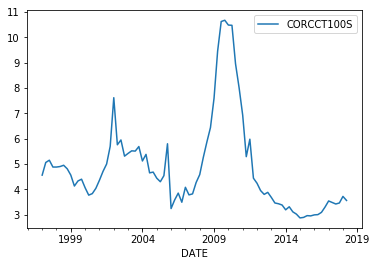

In [14]:
corcct100s.plot()

In [16]:
unrate_corcct100s = web.DataReader(['UNRATE', 'CORCCT100S'], 'fred', begin, end)

In [17]:
unrate_corcct100s.head()

,UNRATE,CORCCT100S
DATE,,
1997-01-01,5.3,4.56
1997-02-01,5.2,NaN
1997-03-01,5.2,NaN
1997-04-01,5.1,5.06
1997-05-01,4.9,NaN


In [19]:
unrate_corcct100s.fillna(method='ffill', inplace=True)

In [20]:
unrate_corcct100s.head()

,UNRATE,CORCCT100S
DATE,,
1997-01-01,5.3,4.56
1997-02-01,5.2,4.56
1997-03-01,5.2,4.56
1997-04-01,5.1,5.06
1997-05-01,4.9,5.06


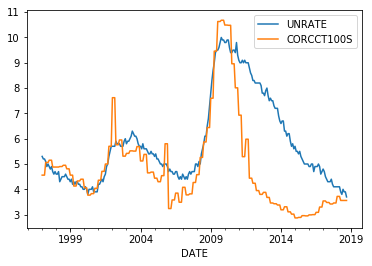

In [21]:
unrate_corcct100s.plot()

## Visualization using Plotnine

In [36]:
import plotnine as p9

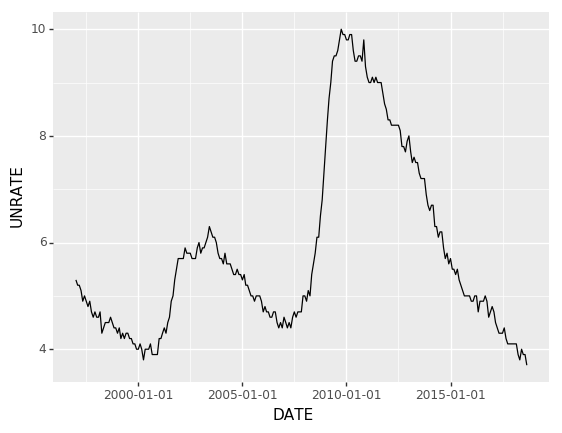

<ggplot: (8776871081883)>

In [55]:
p9.ggplot(unrate.reset_index()) + p9.geom_line(p9.aes(x='DATE', y='UNRATE'))

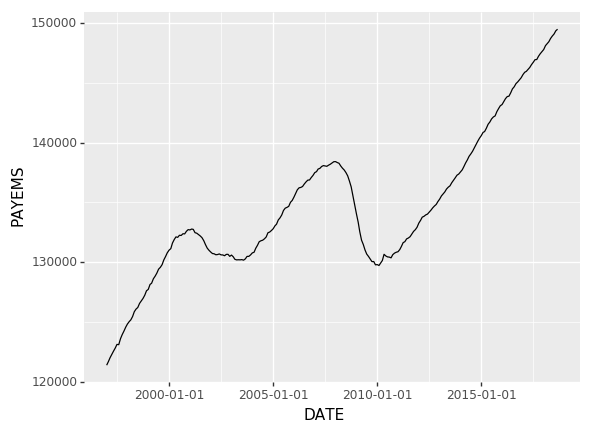

<ggplot: (-9223363259979678215)>

In [56]:
p9.ggplot(payems.reset_index()) + p9.geom_line(p9.aes(x='DATE', y='PAYEMS'))

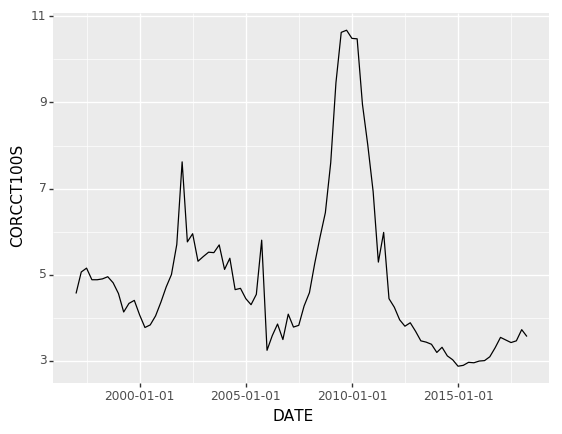

<ggplot: (8776871266238)>

In [57]:
p9.ggplot(corcct100s.reset_index()) + p9.geom_line(p9.aes(x='DATE', y='CORCCT100S'))